#Preprocessing and Text Normalization

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download stopwords from NLTK
nltk.download('stopwords')

# Define Gujarati stopwords
stop_words = set(['और', 'का', 'है', 'के', 'की', 'से', 'को', 'पर', 'यह', 'था', 'हूँ', 'ही', 'हैं', 'इस', 'था', 'हो', 'है', 'भी', 'जो', 'तक', 'में', 'नहीं', 'तो', 'कर', 'रहा', 'थे', 'एक', 'कि', 'था', 'थे', 'सब', 'कभी', 'होता', 'बाद', 'साथ', 'लिए', 'दो', 'अब', 'तक', 'आप', 'हम', 'वे', 'उन', 'उनका', 'मुझे', 'यहाँ', 'किया', 'दिया', 'गया', 'रही', 'रहे', 'क्या', 'कौन', 'कब', 'कैसे', 'जैसे', 'जब', 'किस', 'यदि', 'यही', 'उसे', 'वह', 'थी', 'रख', 'हो', 'हूँ', 'जाता', 'जाती', 'रहेगा', 'होगा', 'जाने', 'करना', 'आदि', 'कहाँ', 'यानी', 'उसका'
])

# Load the dataset
data = pd.read_csv('hindi_fnl_dataset.csv')  # Replace with your actual path

# Text cleaning function for normalization
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\u0900-\u097F ]', '', text)  # Keep only Hindi (Devanagari) characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the text cleaning function to the 'Sentence' column
data['cleaned_text'] = data['Sentence'].apply(clean_text)

# Filter sentences based on length (e.g., between 5 and 50 words)
min_length = 5
max_length = 50

def filter_sentence_length(text):
    word_count = len(text.split())
    return min_length <= word_count <= max_length

data = data[data['cleaned_text'].apply(filter_sentence_length)]

# Label encoding for Sentiment and Emotion
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

data['Sentiment_encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
data['Emotion_encoded'] = emotion_encoder.fit_transform(data['Emotion'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])

# Splitting the dataset into training and testing sets
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X, data['Sentiment_encoded'], test_size=0.2, random_state=42)
X_train_emo, X_test_emo, y_train_emo, y_test_emo = train_test_split(X, data['Emotion_encoded'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Training the Logistic Regression Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Logistic Regression model with class balancing
sentiment_model = LogisticRegression(max_iter=1000, class_weight='balanced')
emotion_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the sentiment model
sentiment_model.fit(X_train_sent, y_train_sent)

# Train the emotion model
emotion_model.fit(X_train_emo, y_train_emo)

# Make predictions on test data
y_pred_sent = sentiment_model.predict(X_test_sent)
y_pred_emo = emotion_model.predict(X_test_emo)

# Evaluate sentiment model
accuracy_sent = accuracy_score(y_test_sent, y_pred_sent)
precision_sent = precision_score(y_test_sent, y_pred_sent, average='weighted')
recall_sent = recall_score(y_test_sent, y_pred_sent, average='weighted')
f1_sent = f1_score(y_test_sent, y_pred_sent, average='weighted')
conf_matrix_sent = confusion_matrix(y_test_sent, y_pred_sent)

# Evaluate emotion model
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
precision_emo = precision_score(y_test_emo, y_pred_emo, average='weighted')
recall_emo = recall_score(y_test_emo, y_pred_emo, average='weighted')
f1_emo = f1_score(y_test_emo, y_pred_emo, average='weighted')
conf_matrix_emo = confusion_matrix(y_test_emo, y_pred_emo)

# Display the evaluation metrics for Sentiment
print("Sentiment Model Evaluation:")
print(f"Accuracy: {accuracy_sent}")
print(f"Precision: {precision_sent}")
print(f"Recall: {recall_sent}")
print(f"F1 Score: {f1_sent}")
print("Confusion Matrix:")
print(conf_matrix_sent)

# Display the evaluation metrics for Emotion
print("\nEmotion Model Evaluation:")
print(f"Accuracy: {accuracy_emo}")
print(f"Precision: {precision_emo}")
print(f"Recall: {recall_emo}")
print(f"F1 Score: {f1_emo}")
print("Confusion Matrix:")
print(conf_matrix_emo)


Sentiment Model Evaluation:
Accuracy: 0.8995373430270985
Precision: 0.9009938457545804
Recall: 0.8995373430270985
F1 Score: 0.899899782480288
Confusion Matrix:
[[10916   666   485]
 [  383  7807   469]
 [  418   771  9858]]

Emotion Model Evaluation:
Accuracy: 0.83715733484405
Precision: 0.8382392181578857
Recall: 0.83715733484405
F1 Score: 0.8372220959905912
Confusion Matrix:
[[3123    0   10    2   31    1   30   14    3]
 [   2 3473  141  101   23   34  108  119   64]
 [  20   72 2244   44   27   23  106  217   17]
 [  15   90  131 3057   24   14   99  122  523]
 [  51    8   56   11 2950   59   59   37    9]
 [   4   20   56   12   70 3990  108   22   33]
 [  66   96  171   70   74   93 2780   94   48]
 [  21   52  256   71   42   26   99 2063   45]
 [   2   83   76  625   28   56   73   65 2919]]


#Testing with Custom Gujarati Sentences and Their English Translation

In [ ]:
# Custom sentences for testing (Gujarati poetry)
custom_sentences = ["तेरी बातें दिल को सुकून देती हैं जैसे सावन की पहली बारिश",
"दिल के कोने में कुछ टूटता हुआ सा महसूस होता है, जैसे पत्ते गिरते हैं शाखों से",
"अगर आप अपने सपनों को सच करना चाहते हैं, तो आपको लगातार प्रयास करना होगा",
"जब सह-अस्तित्व सहायता करता है, तब जीवन को अपनाना सरल हो जाता है",
"जब भोर की किरणें दिल को छूती हैं तो हर दिन एक नया उत्साह लेकर आता है"
]

# English translations for reference
english_translations = ["Your words bring peace to my heart, like the first rain of the monsoon",
"In the depths of my heart, there is a silence, like an instrument without melody",
"If you want to make your dreams come true, you have to keep making continuous efforts",
"When coexistence offers help, accepting life becomes easier",
"When the rays of dawn touch the heart, each day brings a new excitement"
]

# Preprocess the custom sentences
custom_processed_sentences = [clean_text(sentence) for sentence in custom_sentences]

# Transform the custom sentences using the TF-IDF vectorizer
custom_tfidf = tfidf.transform(custom_processed_sentences)

# Predict sentiment for custom sentences
custom_sentiment_pred = sentiment_model.predict(custom_tfidf)
custom_emotion_pred = emotion_model.predict(custom_tfidf)

# Decode the predictions
custom_sentiment_labels = sentiment_encoder.inverse_transform(custom_sentiment_pred)
custom_emotion_labels = emotion_encoder.inverse_transform(custom_emotion_pred)

# Display the predictions alongside the original sentences and English translations
for i, sentence in enumerate(custom_sentences):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {english_translations[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_labels[i]}")
    print(f"Predicted Emotion: {custom_emotion_labels[i]}")
    print("-" * 50)


Gujarati Sentence: तेरी बातें दिल को देती हैं जैसे सावन की पहली बारिश
English Translation: Your words bring peace to my heart, like the first rain of the monsoon
Predicted Sentiment: Negative
Predicted Emotion: Sadness
--------------------------------------------------
Gujarati Sentence: दिल के कोने में कुछ टूटता हुआ सा महसूस होता है, जैसे पत्ते गिरते हैं शाखों से
English Translation: In the depths of my heart, there is a silence, like an instrument without melody
Predicted Sentiment: Negative
Predicted Emotion: Grief
--------------------------------------------------
Gujarati Sentence: अगर आप अपने सपनों को सच करना चाहते हैं, तो आपको लगातार प्रयास करना होगा
English Translation: If you want to make your dreams come true, you have to keep making continuous efforts
Predicted Sentiment: Positive
Predicted Emotion: Love
--------------------------------------------------
Gujarati Sentence: जब सह-अस्तित्व सहायता करता है, तब जीवन को अपनाना सरल हो जाता है
English Translation: When coexistence o

#ROC and AUC Curve Plotting

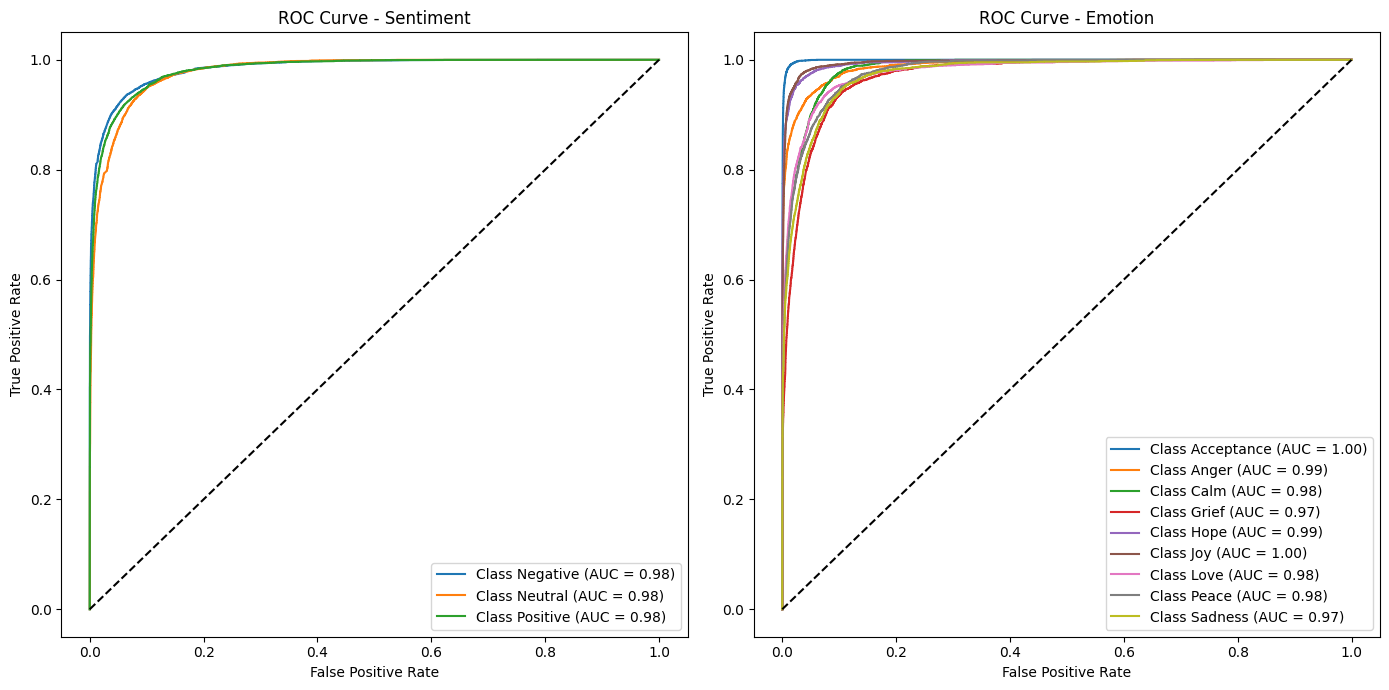

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class ROC/AUC
y_test_sent_binarized = label_binarize(y_test_sent, classes=range(len(sentiment_encoder.classes_)))
y_test_emo_binarized = label_binarize(y_test_emo, classes=range(len(emotion_encoder.classes_)))

# Get the predicted probabilities
y_pred_sent_proba = sentiment_model.predict_proba(X_test_sent)
y_pred_emo_proba = emotion_model.predict_proba(X_test_emo)

# Plot ROC and AUC for Sentiment
fpr_sent = {}
tpr_sent = {}
roc_auc_sent = {}

for i in range(len(sentiment_encoder.classes_)):
    fpr_sent[i], tpr_sent[i], _ = roc_curve(y_test_sent_binarized[:, i], y_pred_sent_proba[:, i])
    roc_auc_sent[i] = auc(fpr_sent[i], tpr_sent[i])

plt.figure(figsize=(14, 7))

# Plot ROC curves for Sentiment
plt.subplot(1, 2, 1)
for i in range(len(sentiment_encoder.classes_)):
    plt.plot(fpr_sent[i], tpr_sent[i], label=f'Class {sentiment_encoder.classes_[i]} (AUC = {roc_auc_sent[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sentiment')
plt.legend(loc="lower right")

# Plot ROC and AUC for Emotion
fpr_emo = {}
tpr_emo = {}
roc_auc_emo = {}

for i in range(len(emotion_encoder.classes_)):
    fpr_emo[i], tpr_emo[i], _ = roc_curve(y_test_emo_binarized[:, i], y_pred_emo_proba[:, i])
    roc_auc_emo[i] = auc(fpr_emo[i], tpr_emo[i])

# Plot ROC curves for Emotion
plt.subplot(1, 2, 2)
for i in range(len(emotion_encoder.classes_)):
    plt.plot(fpr_emo[i], tpr_emo[i], label=f'Class {emotion_encoder.classes_[i]} (AUC = {roc_auc_emo[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Emotion')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


#Double Bar Graph for True vs Predicted (Sentiment and Emotion)

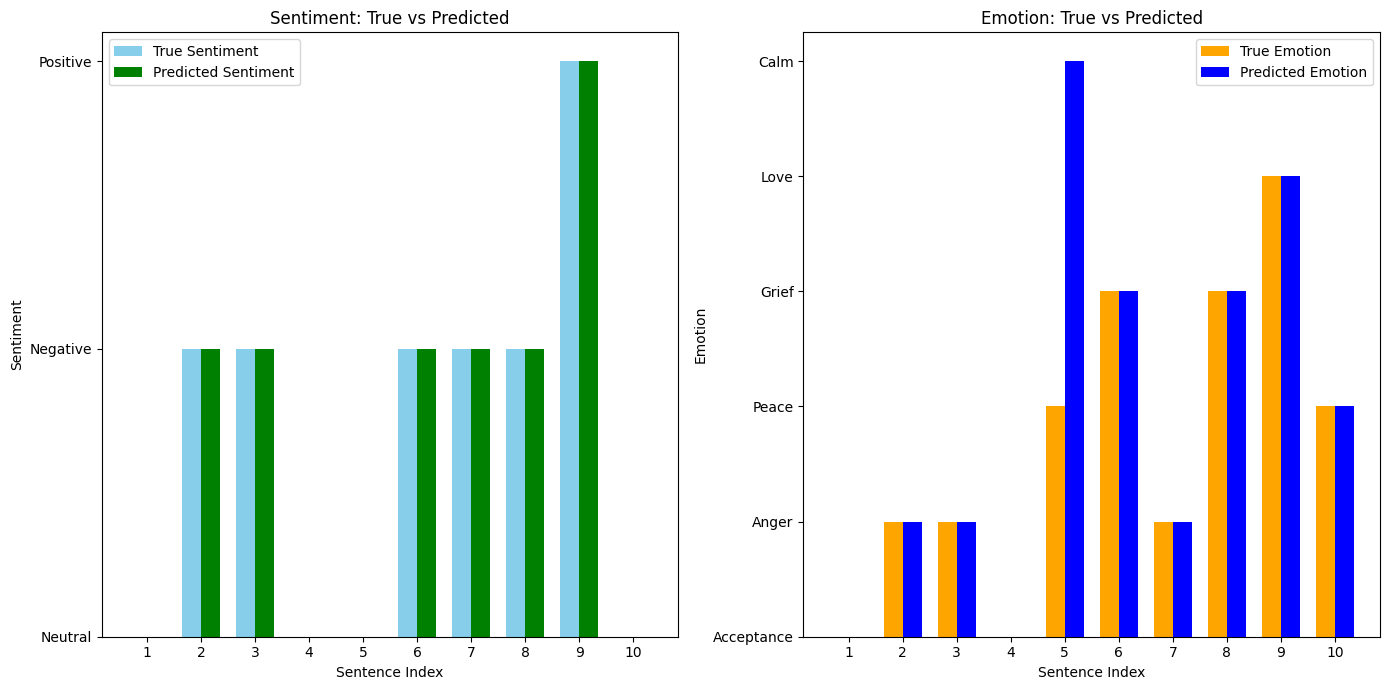

In [ ]:
import numpy as np

# Randomly select 10 sentences from the dataset for testing
sample_data = data.sample(n=10, random_state=42)
sample_sentences = sample_data['Sentence'].tolist()
sample_true_sentiments = sample_data['Sentiment_encoded'].tolist()
sample_true_emotions = sample_data['Emotion_encoded'].tolist()

# Transform the sentences using the TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_data['cleaned_text'])

# Predict sentiment and emotion
pred_sent = sentiment_model.predict(sample_tfidf)
pred_emo = emotion_model.predict(sample_tfidf)

# Decode true and predicted labels
true_sent_labels = sentiment_encoder.inverse_transform(sample_true_sentiments)
true_emo_labels = emotion_encoder.inverse_transform(sample_true_emotions)
pred_sent_labels = sentiment_encoder.inverse_transform(pred_sent)
pred_emo_labels = emotion_encoder.inverse_transform(pred_emo)

# Plotting Bar Plot: True vs Predicted for Sentiment and Emotion
plt.figure(figsize=(14, 7))

# Sentiment Bar Plot
plt.subplot(1, 2, 1)
x = np.arange(len(sample_sentences))  # Label locations
bar_width = 0.35  # Width of the bars

# Plot bars for true sentiment
plt.bar(x - bar_width/2, true_sent_labels, width=bar_width, color='skyblue', label='True Sentiment')

# Plot bars for predicted sentiment
plt.bar(x + bar_width/2, pred_sent_labels, width=bar_width, color='green', label='Predicted Sentiment')

# Label the plot
plt.title('Sentiment: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

# Emotion Bar Plot
plt.subplot(1, 2, 2)
x = np.arange(len(sample_sentences))  # Label locations

# Plot bars for true emotion
plt.bar(x - bar_width/2, true_emo_labels, width=bar_width, color='orange', label='True Emotion')

# Plot bars for predicted emotion
plt.bar(x + bar_width/2, pred_emo_labels, width=bar_width, color='blue', label='Predicted Emotion')

# Label the plot
plt.title('Emotion: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

plt.tight_layout()
plt.show()


#Line Graph for True vs Predicted (Sentiment and Emotion)

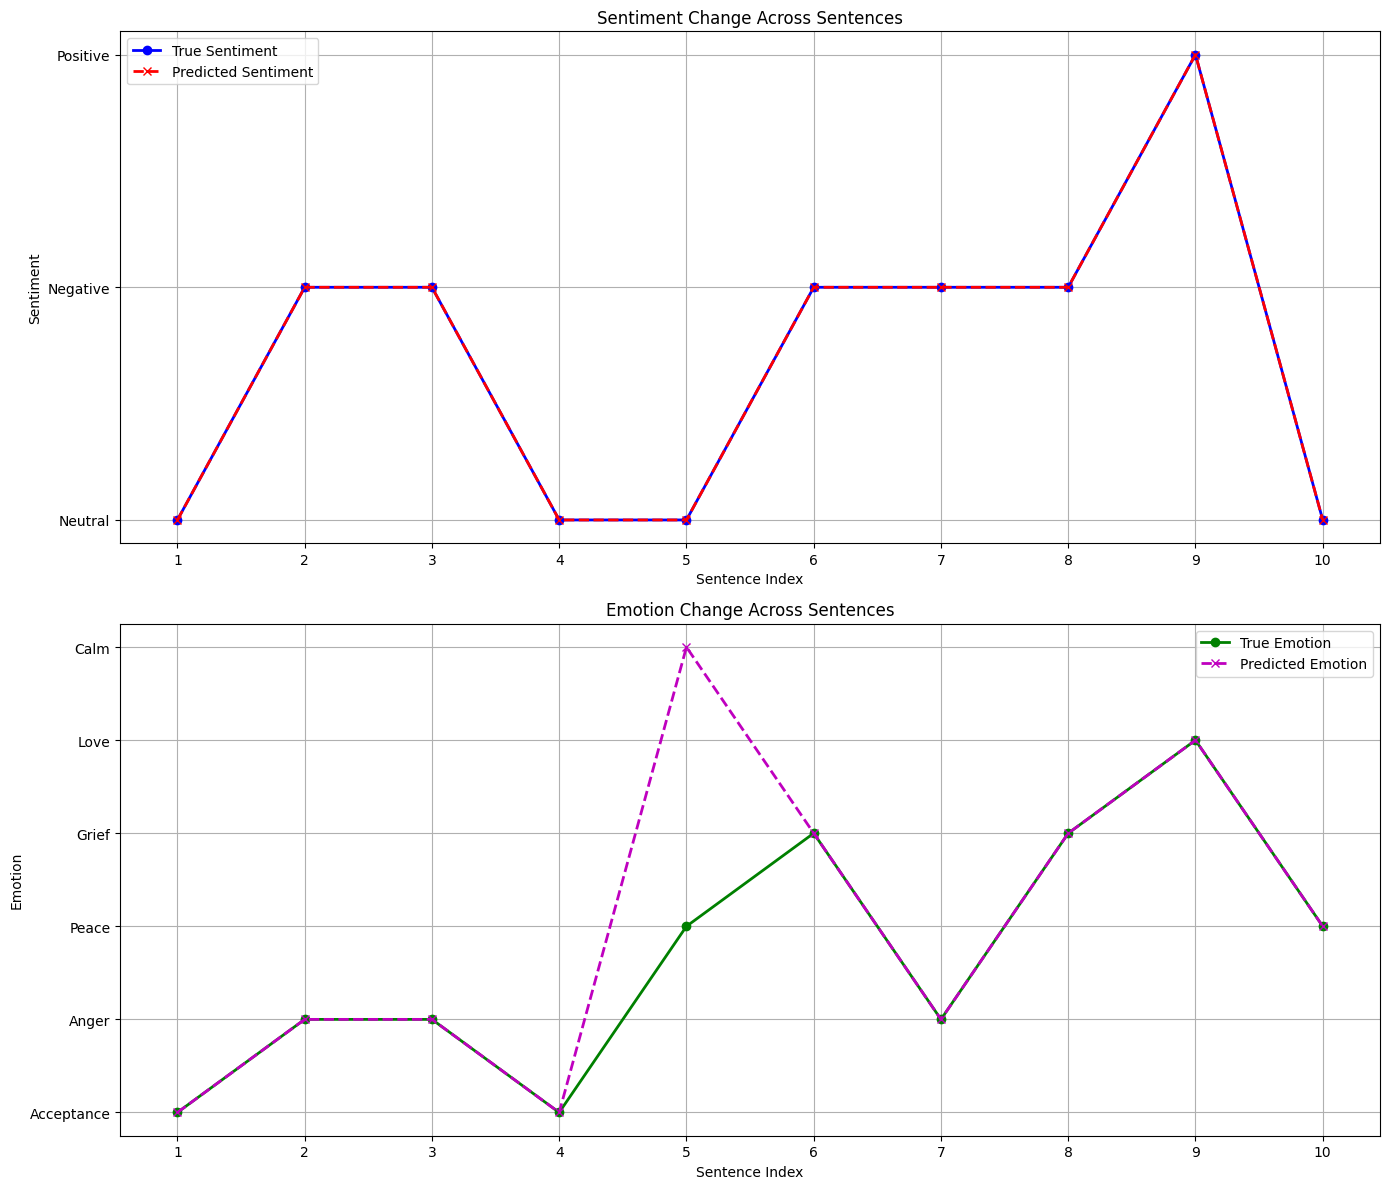

In [ ]:
# Line Graph for Sentiment and Emotion Predictions
plt.figure(figsize=(14, 12))

# Sentiment Line Graph
plt.subplot(2, 1, 1)
plt.plot(range(len(sample_sentences)), true_sent_labels, marker='o', linestyle='-', color='b', label='True Sentiment', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_sent_labels, marker='x', linestyle='--', color='r', label='Predicted Sentiment', linewidth=2)
plt.title('Sentiment Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

# Emotion Line Graph
plt.subplot(2, 1, 2)
plt.plot(range(len(sample_sentences)), true_emo_labels, marker='o', linestyle='-', color='g', label='True Emotion', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_emo_labels, marker='x', linestyle='--', color='m', label='Predicted Emotion', linewidth=2)
plt.title('Emotion Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
